<a href="https://www.kaggle.com/code/lucascoldmater/radar-graph-word-count-portuguese?scriptVersionId=131036812" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Objective
The idea is to have a radar graph that shows how many times a word appears in a dataset and compare the  words most used to others datasets.

You can also search for certain words in the datasets and have them plot their quantities with the radar graph. But you have to choose at least 3 words.

# Necessary Libraries

In [1]:
import os
import pandas as pd
import datetime 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
import string
from itertools import islice
from math import pi
nltk.download('stopwords')
nltk.download('punkt')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Necessary Functions

In [2]:
def set_stopwords():  # Setting stop words
    with open('/kaggle/input/more-portuguese-stop-words/portuguese_stop_words.txt') as file:
        data = file.read()
        data = data.split()
    stop_words = set(stopwords.words('portuguese'))
    stop_words.update(data)
    stop_words.update(['pra'])
    for i in range(len(string.punctuation)):
        stop_words.add(string.punctuation[i])
    return stop_words

In [3]:
def treat_words(text, stop_words):
    processed_list = [] # Tirando stopwords e palavras desnecessárias
    for word in text:
        word = re.sub(r'http\S+', '', word) 
        word = re.sub(r'@\S+', '', word)    
        word = re.sub(r'\d+', '', word)
        word = re.sub(r'\b\w{1}\b', '', word)
        words = word_tokenize(word.lower(), language = 'portuguese')
        filtered_words = [word for word in words if word not in stop_words]
        processed_text = ' '.join(filtered_words)
        processed_list.append(processed_text)
    return processed_list

In [4]:
def put_list_in_text_and_sort(p_list):  # Returns a dictionary
    alltweets = ''
    for sentence in p_list:               # Transforming into a single text
        alltweets += sentence
    alltweets = alltweets.split()         # Spliting the words in a list
    counts = dict()
    for word in alltweets:                # Creating a dictionary with the words and it's occurrences
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    counts = dict(reversed(sorted(counts.items(), key=lambda item : item[1])))  # Ordenando o dicionário
    return counts

In [5]:
def first_elements_dictionary(dic_elements, n_elements):  # Picks the first n_elements of the dictionary
    n_items = list(islice(dic_elements.items(), n_elements))
    categories = []
    values = []
    for i in range(len(n_items)):
        categories.append(n_items[i][0])
        values.append(n_items[i][1])
    return categories, values  # Return a tuple with 2 lists, one with categories and other with the values

# Making the graphs

In [6]:
def plot_one_radar(text, n_elements):
    stop_words = set_stopwords()  # Setting the stop_words
  
    processed_list = treat_words(text, stop_words)  # Pre-processing the data
  
    counts = put_list_in_text_and_sort(processed_list)  # Creating the dictionary

    cat, val = first_elements_dictionary(counts, n_elements) # Getting the most used words
  
    big = max(val)
    # Creating the graph
    N = len(cat)
    angles = [ n / float(N)*2*pi for n in range(N)]
    angles = angles + angles[:1]
    plt.figure(figsize = (10,10))
    ax = plt.subplot(111,polar = True)
    ax.set_theta_offset(pi/2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1],cat)
    ax.set_rlabel_position(0)
    rounded_numb = [big - round(big/100*50), big - round(big/100*75)]
    plt.yticks([0, rounded_numb[0], rounded_numb[1], big],["0", str(rounded_numb[0]),str(rounded_numb[1]), str(big)],color= "red", size = 7)
    plt.ylim(0, big)
  
    values = val + val[:1]
    ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="Palavras mais faladas" )
    ax.fill(angles,values,"orange",alpha=0.1)
    plt.legend(loc = "upper left",bbox_to_anchor = (0.1,0.1))
    plt.show()

In [7]:
def plot_radar_multiple(textlist, word_numb, names):
    stop_words = set_stopwords()
  
    processed_lists = []
    counts = []
    for i in range(len(textlist)):
        processed_lists.append(treat_words(textlist[i], stop_words))
        counts.append(put_list_in_text_and_sort(processed_lists[i]))

    categories_compare, values_compare = first_elements_dictionary(counts[0], word_numb)
  
    values_compared = []
    for i in range(len(counts) - 1):
        val_aux = []
        for j in range(len(categories_compare)):
            if categories_compare[j] in counts[i + 1]:
                val_aux.append(counts[i+1][categories_compare[j]])
            else:
                val_aux.append(0)
        values_compared.append(val_aux)
    big = max([max(max(values_compared, key=max)), max(values_compare)])

    N = len(categories_compare)
    angles = [ n / float(N)*2*pi for n in range(N)]
    angles = angles + angles[:1]
    plt.figure(figsize = (10,10))
    ax = plt.subplot(111,polar = True)
    ax.set_theta_offset(pi/2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories_compare)
    ax.set_rlabel_position(0)
    rounded_numb = [big - round(big/100*50), big - round(big/100*75)]
    plt.yticks([0, rounded_numb[0], rounded_numb[1], big],["0", str(rounded_numb[0]),str(rounded_numb[1]), str(big)],color= "red", size = 7)
    plt.ylim(0, big)

    colors = [ 'g', 'r', 'c', 'm', 'y', 'k', 'w']

    values = values_compare + values_compare[:1]
    ax.plot(angles,values,linewidth = 1,linestyle="solid",label =names[0])
    ax.fill(angles,values,"b",alpha=0.1)

    for i in range(len(values_compared)):
        values = values_compared[i] + values_compared[i][:1]
        ax.plot(angles,values,linewidth = 1,linestyle="solid",label = names[i+1])
        ax.fill(angles,values,colors[i],alpha=0.1)
  
    plt.legend(loc = "upper left",bbox_to_anchor = (0,1))
    plt.show()

In [8]:
def seek_words_and_plot_spider(list_of_words, textlist, names): # Seek certain words on a list of tweets
    if len(list_of_words) < 3:
        return 'ERROR: list_of_words lenght < 3, not possible to plot'
    
    stop_words = set_stopwords()

    processed_lists = []
    counts = []
    for i in range(len(textlist)):
        processed_lists.append(treat_words(textlist[i], stop_words))
        counts.append(put_list_in_text_and_sort(processed_lists[i]))

    values = []
    for i in range(len(counts)):
        values_aux = []
        for j in range(len(list_of_words)):    
            if list_of_words[j] in counts[i]:
                values_aux.append(counts[i][list_of_words[j]])
            else:
                values_aux.append(0)
        values.append(values_aux)

    big = max(max(values, key=max))
    N = len(list_of_words)
    angles = [ n / float(N)*2*pi for n in range(N)]
    angles = angles + angles[:1]
    plt.figure(figsize = (10,10))
    ax = plt.subplot(111,polar = True)
    ax.set_theta_offset(pi/2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], list_of_words)
    ax.set_rlabel_position(0)
    rounded_numb = [big - round(big/100*50), big - round(big/100*75)]
    plt.yticks([0, rounded_numb[0], rounded_numb[1], big],["0", str(rounded_numb[0]),str(rounded_numb[1]), str(big)],color= "red", size = 7)
    plt.ylim(0, big)

    colors = [ 'g', 'r', 'c', 'm', 'y', 'k', 'w']

    for i in range(len(values)):
        value = values[i] + values[i][:1]
        ax.plot(angles,value,linewidth = 1,linestyle="solid",label = names[i])
        ax.fill(angles,value,colors[i],alpha=0.1)

    plt.legend(loc = "upper left",bbox_to_anchor = (0,1))
    plt.show()

# Loading Presidential Tweets

In [9]:
tw_b = pd.read_csv('/kaggle/input/2022-brazilian-presidential-candidates-tweets/tweets_bolsonaro.csv')
tw_l = pd.read_csv('/kaggle/input/2022-brazilian-presidential-candidates-tweets/tweets_lula.csv')
tw_t = pd.read_csv('/kaggle/input/2022-brazilian-presidential-candidates-tweets/tweets_tebet.csv')

In [10]:
tw_b

,date,rawContent,replyCount,retweetCount,likeCount,quoteCount,viewCount
0,2023-05-19 12:52:02+00:00,"• R$ 2,6 bilhões para investimentos privados...",97,484,3198,5,51378.0
1,2023-05-19 12:52:01+00:00,". Foram pavimentados, duplicados ou recuperado...",65,502,3196,7,54435.0
2,2023-05-19 12:52:00+00:00,INFRAESTRUTURA / Governo Jair Bolsonaro\n\n • ...,828,1533,7375,24,105929.0
3,2023-05-18 11:04:54+00:00,https://t.co/KfG8eJTKxL,2427,3777,21195,185,347155.0
4,2023-05-17 15:50:22+00:00,. Tempo para abrir uma nova empresa no Brasil ...,219,1135,8137,24,162861.0
...,...,...,...,...,...,...,...
9995,2018-07-27 13:27:10+00:00,Via @odiodobem : “O combate diário à intolerân...,272,727,3536,106,NaN
9996,2018-07-27 12:41:19+00:00,Quem esquece seu passado está condenado a não ...,119,783,4554,47,NaN
9997,2018-07-27 01:48:15+00:00,#MulherescomBolsonaro: Tomei conhecimento sobr...,1087,3147,18752,539,NaN
9998,2018-07-26 14:15:16+00:00,Pela causa roubam o futuro de nossas crianças....,209,1017,4333,96,NaN


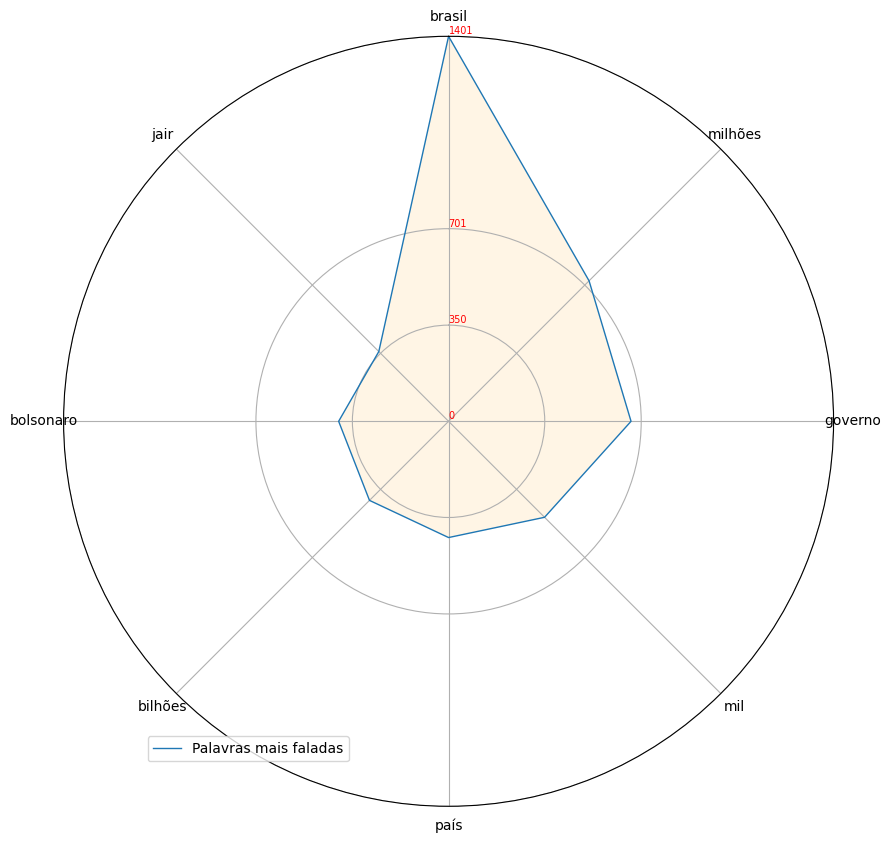

In [11]:
plot_one_radar(tw_b.rawContent, 8)

In [12]:
tw_l

,date,rawContent,replyCount,retweetCount,likeCount,quoteCount,viewCount
0,2023-05-19 14:11:11+00:00,Já é noite aqui no Japão. Na madrugada de sába...,506,904,6778,37,222105.0
1,2023-05-19 12:53:06+00:00,"Na sua cidade, quanto está a gasolina? E o Eta...",4799,2310,28238,515,2023160.0
2,2023-05-19 09:16:46+00:00,"Em Hiroshima, na primeira reunião bilateral de...",655,1697,16834,111,619107.0
3,2023-05-18 23:45:35+00:00,@direitasiqueira こんばんは、ブラジル。おはよう、日本。,848,2828,28477,2481,2006514.0
4,2023-05-18 22:37:16+00:00,1 milhão de novas famílias beneficiadas desde ...,759,1531,10076,66,349081.0
...,...,...,...,...,...,...,...
9995,2019-04-07 14:13:18+00:00,O ex-presidente recebeu mais de 35 mil cartas ...,79,198,786,22,NaN
9996,2019-04-07 14:05:30+00:00,Artigo do Lula na Folha de S.Paulo: Por que tê...,94,293,912,41,NaN
9997,2019-04-07 13:52:57+00:00,O povo toma conta dos arredores da Polícia Fed...,106,183,739,31,NaN
9998,2019-04-07 13:48:15+00:00,📣 ACOMPANHE O MINUTO A MINUTO DA JORNADA #Lula...,29,75,242,13,NaN


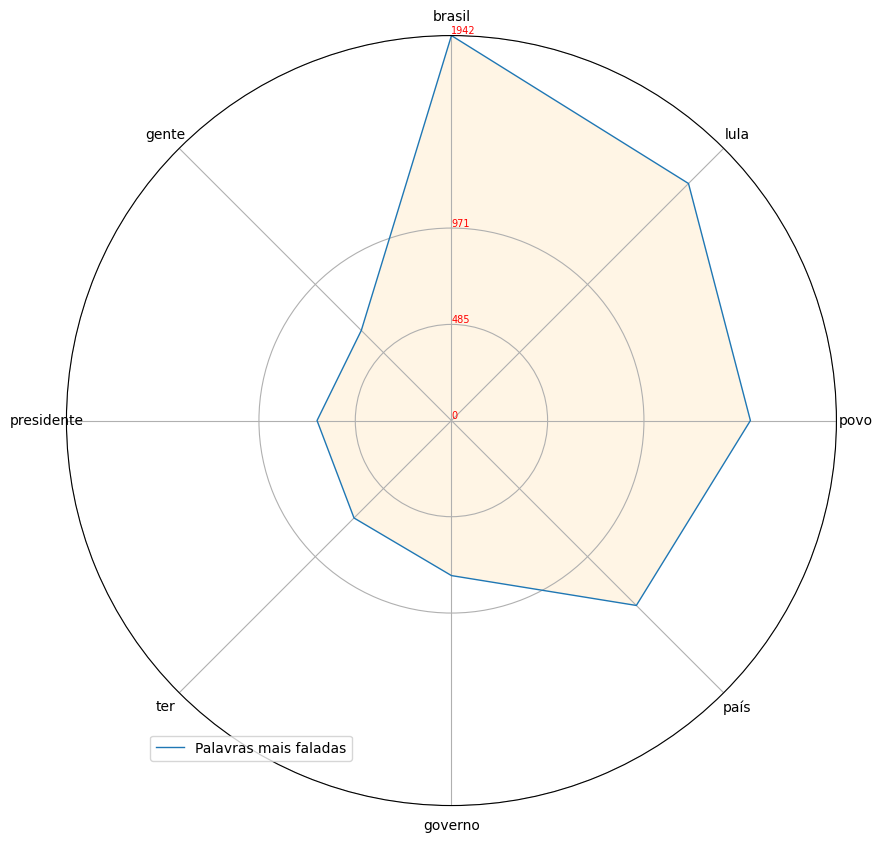

In [13]:
plot_one_radar(tw_l.rawContent, 8)

In [14]:
tw_t

,date,rawContent,replyCount,retweetCount,likeCount,quoteCount,viewCount
0,2023-05-09 16:04:06+00:00,Rita Lee era a representação viva da liberdade...,196,227,3751,1,71535.0
1,2023-05-09 13:00:12+00:00,https://t.co/p4TTK7FLTh,123,99,960,5,35501.0
2,2023-05-05 22:16:40+00:00,"Contudo, é preciso se manter alerta e continua...",30,37,538,2,15060.0
3,2023-05-05 22:16:38+00:00,"Perdemos pessoas queridas, tivemos que nos afa...",16,39,649,1,17856.0
4,2023-05-05 22:16:34+00:00,Um dia para se celebrar! A Organização Mundial...,150,149,1712,10,37910.0
...,...,...,...,...,...,...,...
3160,2014-07-12 13:00:56+00:00,Bom dia Mato Grosso do Sul! Bom fim de semana!,0,2,2,0,NaN
3161,2014-07-11 18:01:52+00:00,"Simone Tebet foi deputada estadual, prefeita d...",0,2,3,0,NaN
3162,2014-07-11 15:51:56+00:00,"Meu pai Ramez Tebet, a inspiração que me move ...",0,1,1,0,NaN
3163,2014-07-11 15:43:35+00:00,Concurso com 200 vagas recebe inscrições até h...,0,1,1,0,NaN


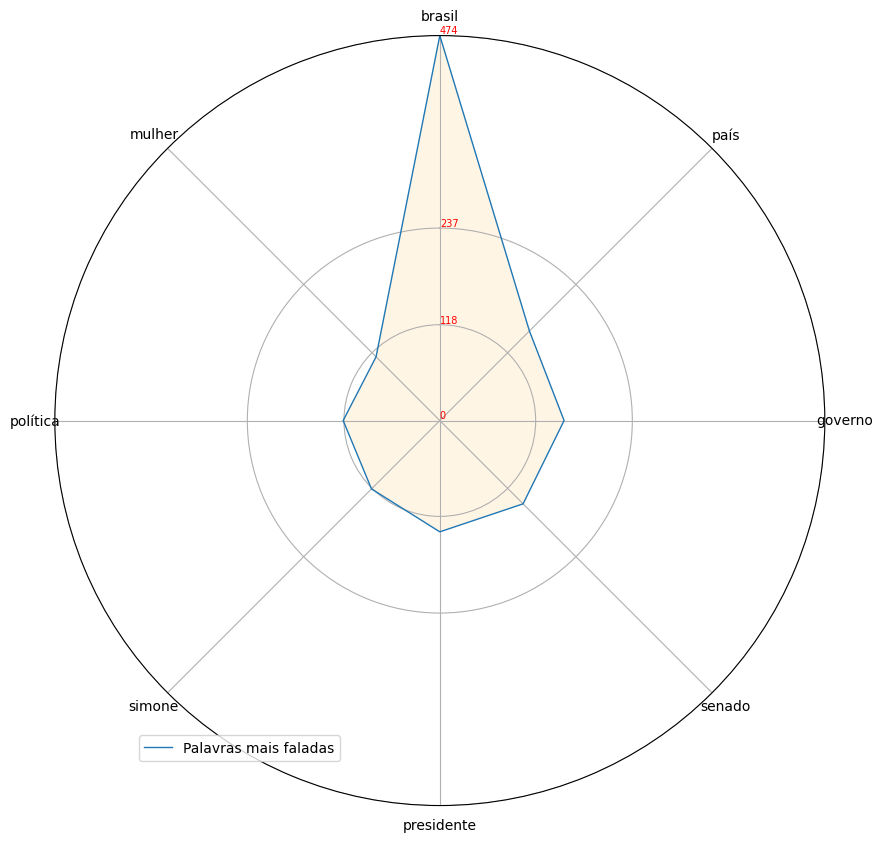

In [15]:
plot_one_radar(tw_t.rawContent, 8)

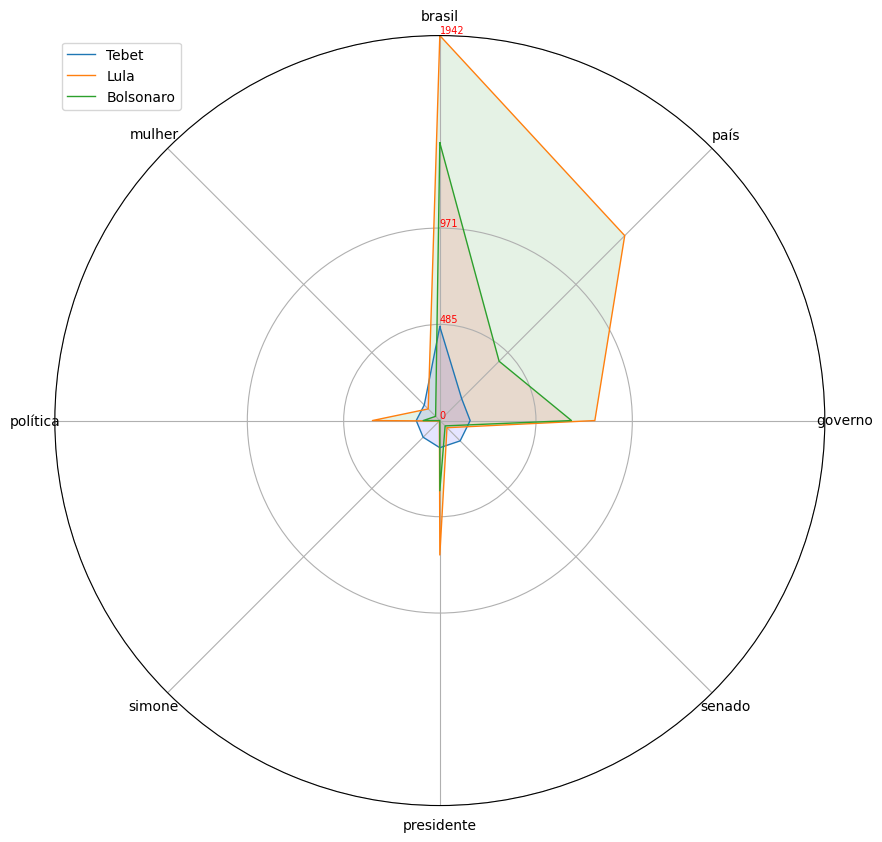

In [16]:
plot_radar_multiple([tw_t.rawContent, tw_l.rawContent, tw_b.rawContent], 8, ['Tebet', 'Lula', 'Bolsonaro'])

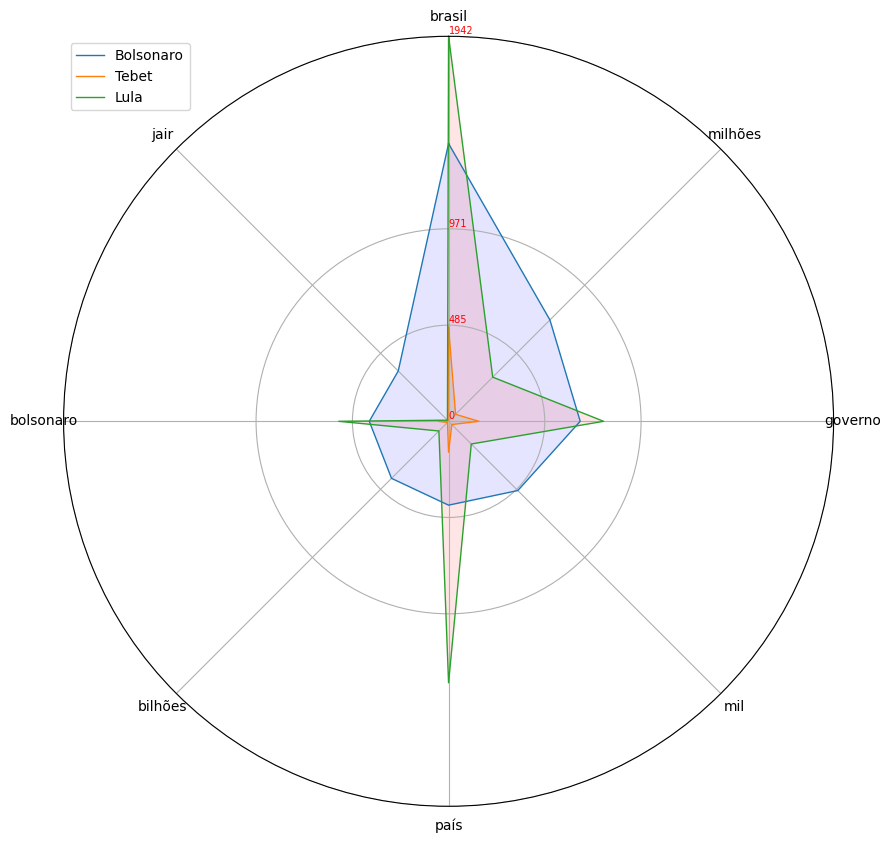

In [17]:
plot_radar_multiple([tw_b.rawContent, tw_t.rawContent, tw_l.rawContent, ], 8, ['Bolsonaro', 'Tebet', 'Lula'])

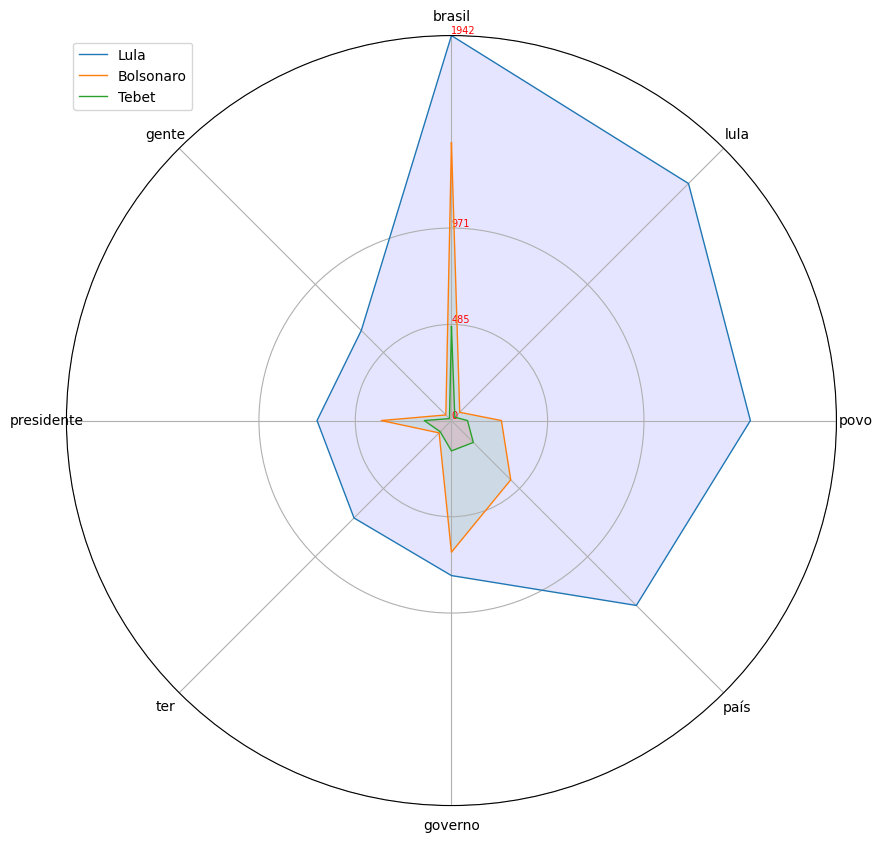

In [18]:
plot_radar_multiple([tw_l.rawContent, tw_b.rawContent, tw_t.rawContent,], 8, ['Lula', 'Bolsonaro', 'Tebet'])

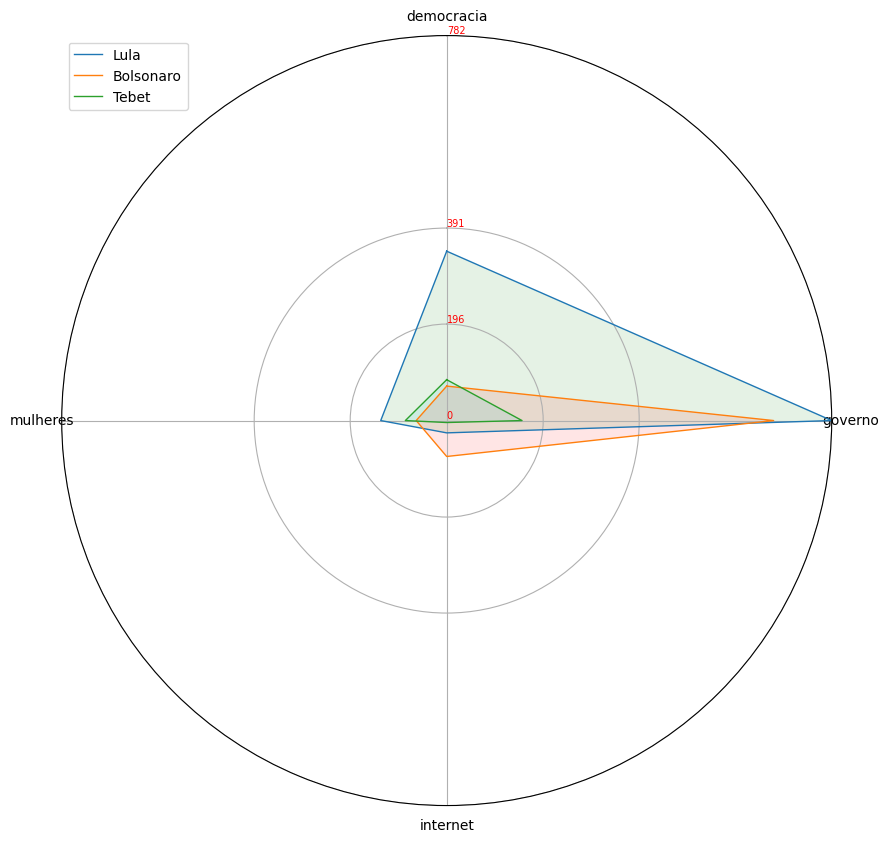

In [19]:
seek_words_and_plot_spider(['democracia', 'governo', 'internet', 'mulheres'], [tw_l.rawContent, tw_b.rawContent, tw_t.rawContent], ['Lula', 'Bolsonaro', 'Tebet'])